<a href="https://colab.research.google.com/github/bootstrap666/Estocasticos2021Exercicio1/blob/main/processos_estocasticos_exercicio_3_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Um jogo de dados
A tarefa deve ser resolvida com o auxílio de uma ferramenta computacional (google colab, matlab ou similares)

Considere um jogo hipotético no qual três dados de seis faces são rolados simultaneamente e os participantes devem apostar no resultado da soma das faces voltadas para cima. Considere que os dados não são viciados. 

1. Descreva um espaço amostral adequado para o experimento;

2. A depender do espaço amostral escolhido, descreva o espaço de eventos associados aos eventos "A soma das faces é x" em que x é um número inteiro entre 3 e 18;

3. Associe probabilidades iguais para cada resultado do experimento. Determine as probabilidades de cada evento determinado no item anterior;

4. Simule 50.000 experimentos aleatórios e produza um histograma da soma das faces encontradas para os experimentos. Compare o resultado da simulação com as probabilidades encontradas no item anterior.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

nfaces = 6

O jogo utiliza dados não-viciados portanto qualquer configuração de três faces voltadas para cima tem a mesma probabilidade. Para simplificar a associação de uma medida de probabilidade no terceiro passo, escolheu-se definir os resultados do experimento como todas as possibilidades de três faces voltadas para cima. Para isso foi utilizado uma matriz **resultados** que contém um resultado do experimento por linha detalhado com o resultado do primeiro dado na primeira coluna, o resultado do segundo dado na segunda coluna e o resultado do terceiro dado na terceira coluna.

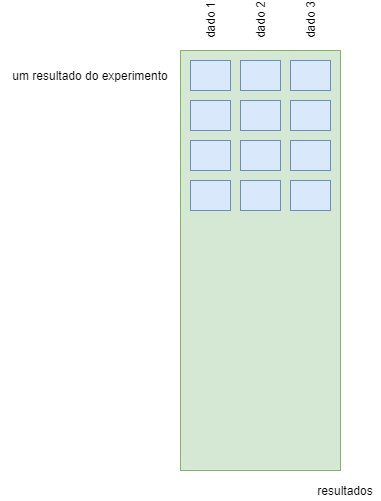

In [3]:
nresultados = nfaces*nfaces*nfaces

resultados = np.zeros((nresultados,3))

for i in range(1,nfaces+1):
  for j in range(1,nfaces+1):
    for k in range(1,nfaces+1):
      resultados[(i-1)*nfaces**2 + (j-1)*nfaces + (k-1),0] = i
      resultados[(i-1)*nfaces**2 + (j-1)*nfaces + (k-1),1] = j
      resultados[(i-1)*nfaces**2 + (j-1)*nfaces + (k-1),2] = k
print(resultados)

[[1. 1. 1.]
 [1. 1. 2.]
 [1. 1. 3.]
 [1. 1. 4.]
 [1. 1. 5.]
 [1. 1. 6.]
 [1. 2. 1.]
 [1. 2. 2.]
 [1. 2. 3.]
 [1. 2. 4.]
 [1. 2. 5.]
 [1. 2. 6.]
 [1. 3. 1.]
 [1. 3. 2.]
 [1. 3. 3.]
 [1. 3. 4.]
 [1. 3. 5.]
 [1. 3. 6.]
 [1. 4. 1.]
 [1. 4. 2.]
 [1. 4. 3.]
 [1. 4. 4.]
 [1. 4. 5.]
 [1. 4. 6.]
 [1. 5. 1.]
 [1. 5. 2.]
 [1. 5. 3.]
 [1. 5. 4.]
 [1. 5. 5.]
 [1. 5. 6.]
 [1. 6. 1.]
 [1. 6. 2.]
 [1. 6. 3.]
 [1. 6. 4.]
 [1. 6. 5.]
 [1. 6. 6.]
 [2. 1. 1.]
 [2. 1. 2.]
 [2. 1. 3.]
 [2. 1. 4.]
 [2. 1. 5.]
 [2. 1. 6.]
 [2. 2. 1.]
 [2. 2. 2.]
 [2. 2. 3.]
 [2. 2. 4.]
 [2. 2. 5.]
 [2. 2. 6.]
 [2. 3. 1.]
 [2. 3. 2.]
 [2. 3. 3.]
 [2. 3. 4.]
 [2. 3. 5.]
 [2. 3. 6.]
 [2. 4. 1.]
 [2. 4. 2.]
 [2. 4. 3.]
 [2. 4. 4.]
 [2. 4. 5.]
 [2. 4. 6.]
 [2. 5. 1.]
 [2. 5. 2.]
 [2. 5. 3.]
 [2. 5. 4.]
 [2. 5. 5.]
 [2. 5. 6.]
 [2. 6. 1.]
 [2. 6. 2.]
 [2. 6. 3.]
 [2. 6. 4.]
 [2. 6. 5.]
 [2. 6. 6.]
 [3. 1. 1.]
 [3. 1. 2.]
 [3. 1. 3.]
 [3. 1. 4.]
 [3. 1. 5.]
 [3. 1. 6.]
 [3. 2. 1.]
 [3. 2. 2.]
 [3. 2. 3.]
 [3. 2. 4.]
 [3. 2. 5.]
 [3.

Associado a cada resultado do experimento, pode-se verificar a soma das faces voltadas para cima e verificar que alguns valores (por exemplo entre 9 e 13) são mais frequentes que outros (por exemplo 3 e 18)

In [4]:
somafaces = np.sum(resultados,axis=1,dtype=int)
print(somafaces)

[ 3  4  5  6  7  8  4  5  6  7  8  9  5  6  7  8  9 10  6  7  8  9 10 11
  7  8  9 10 11 12  8  9 10 11 12 13  4  5  6  7  8  9  5  6  7  8  9 10
  6  7  8  9 10 11  7  8  9 10 11 12  8  9 10 11 12 13  9 10 11 12 13 14
  5  6  7  8  9 10  6  7  8  9 10 11  7  8  9 10 11 12  8  9 10 11 12 13
  9 10 11 12 13 14 10 11 12 13 14 15  6  7  8  9 10 11  7  8  9 10 11 12
  8  9 10 11 12 13  9 10 11 12 13 14 10 11 12 13 14 15 11 12 13 14 15 16
  7  8  9 10 11 12  8  9 10 11 12 13  9 10 11 12 13 14 10 11 12 13 14 15
 11 12 13 14 15 16 12 13 14 15 16 17  8  9 10 11 12 13  9 10 11 12 13 14
 10 11 12 13 14 15 11 12 13 14 15 16 12 13 14 15 16 17 13 14 15 16 17 18]


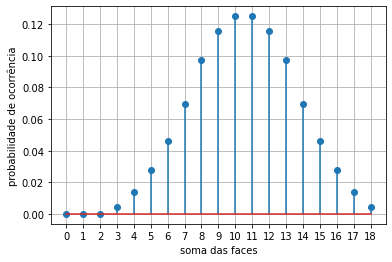

In [5]:
probsomafaces = np.zeros(3*nfaces+1)
for i in range(len(somafaces)):
  probsomafaces[somafaces[i]] = probsomafaces[somafaces[i]] +1
probsomafaces = probsomafaces/(nfaces**3)

plt.stem( range(len(probsomafaces)),probsomafaces, use_line_collection=True)
plt.xlabel('soma das faces')
plt.ylabel('probabilidade de ocorrência')
plt.xticks(range(len(probsomafaces)))
plt.grid('both')

Finalmente, o resultado teórico pode ser refutado ou comprovado por uma simulação de Monte Carlo. Para isso, verifica-se a frequência de cada resultado em 50.000 experimentos aleatórios que simulam o jogo descrito

In [6]:
nexperimentos = 50000
simulacao = np.zeros(3*nfaces+1)
# Para cada experimento
for i in range(nexperimentos):
#inicializa a soma das faces e realiza três sorteios aleatórios de variáveis 
#inteiras entre 1 e 6 com distribuição uniforme (dados não viciados). Adiciona 
#uma ocorrencia no vetor simulacao no resultado da soma sorteada
  soma = 0
  for j in range(3):
    soma = soma + random.randint(1,nfaces)
  simulacao[soma] = simulacao[soma] +1
#ao final do sorteio, divide o numero de ocorrencias pelo total de experimentos 
#para verificar a frequência obtida de cada soma  
simulacao = simulacao/nexperimentos

Finalmente, pode-se comparar os resultados teóricos e de simulação por meio de um gráfico e observar que os resultados da simulação são muito próximos da previsão

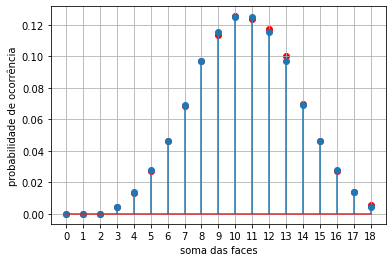

In [7]:
plt.stem( range(len(probsomafaces)),probsomafaces, use_line_collection=True)
plt.scatter( range(len(probsomafaces)),simulacao, c='r')

plt.xlabel('soma das faces')
plt.ylabel('probabilidade de ocorrência')
plt.xticks(range(len(probsomafaces)))
plt.grid('both')